In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset
data = pd.read_csv('sales_pred.txt',sep=",")
data.columns = ["Item_Identifier","Item_Weight","Item_Fat_Content","Item_Visibility","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Outlet_Sales"]
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [27]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [28]:
#Check for duplicates
idsUnique = len(set(data.Item_Identifier))
idsTotal = dataset.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 6964 duplicate IDs for 8523 total entries


Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

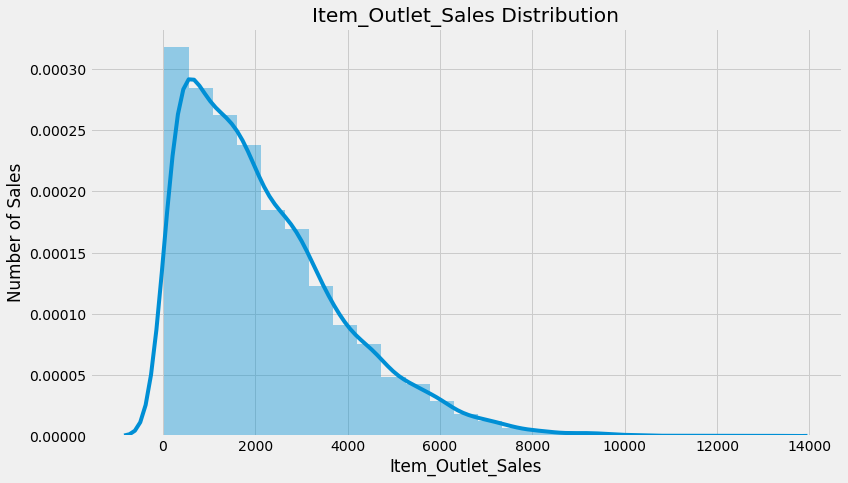

In [29]:
#Univariate Analysis
#Distribution of the target variable: Item_Outlet_Sales
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(data.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [31]:
#Numeric Features
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [32]:
#Correlation between Numerical Predictors and Target variable
corr = numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [34]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


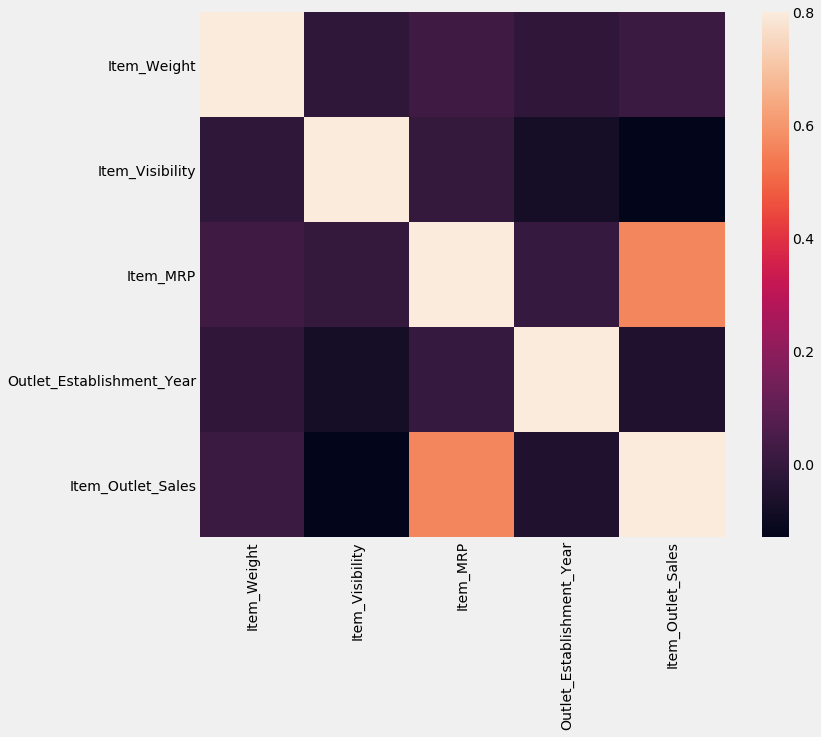

In [35]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

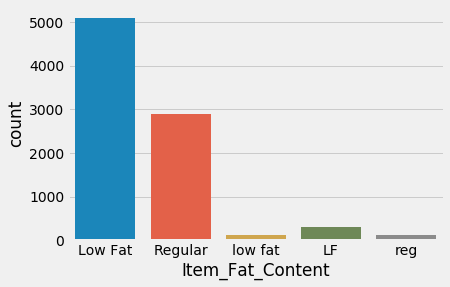

In [36]:
#Categorical Predictors
#Distribution of the variable Item_Fat_Content
#For Item_Fat_Content there are two possible choices : “Low Fat” or “Regular”. 
#However, in our data we have these two types of Fat writen in different manners. This must be corrected.
sns.countplot(data.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

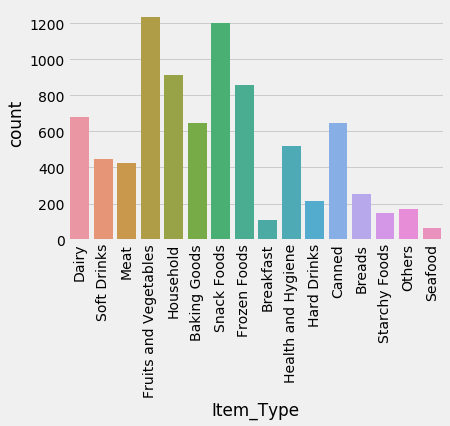

In [37]:
#Distribution of the variable Item_Type
sns.countplot(data.Item_Type)
plt.xticks(rotation=90)

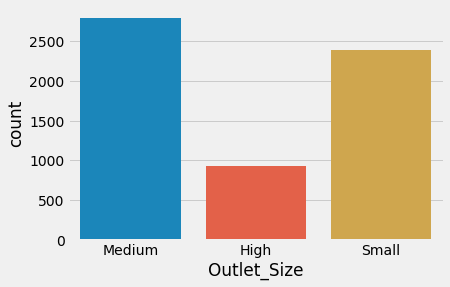

In [38]:
sns.countplot(data.Outlet_Size)

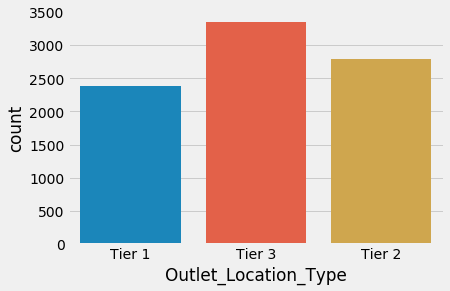

In [39]:
sns.countplot(data.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

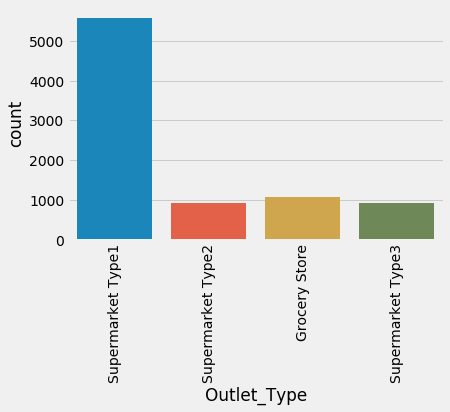

In [41]:
sns.countplot(data.Outlet_Type)
plt.xticks(rotation=90)

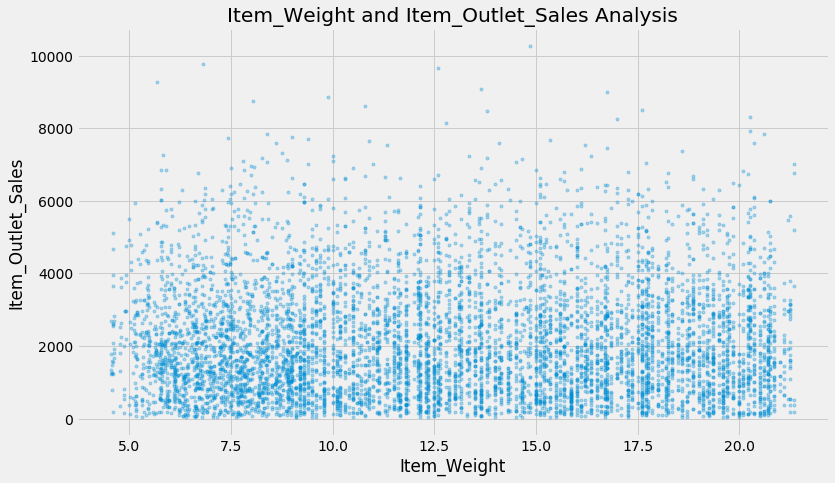

In [44]:
# Bivariate Analysis
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(data.Item_Weight, data.Item_Outlet_Sales,'.', alpha = 0.3)

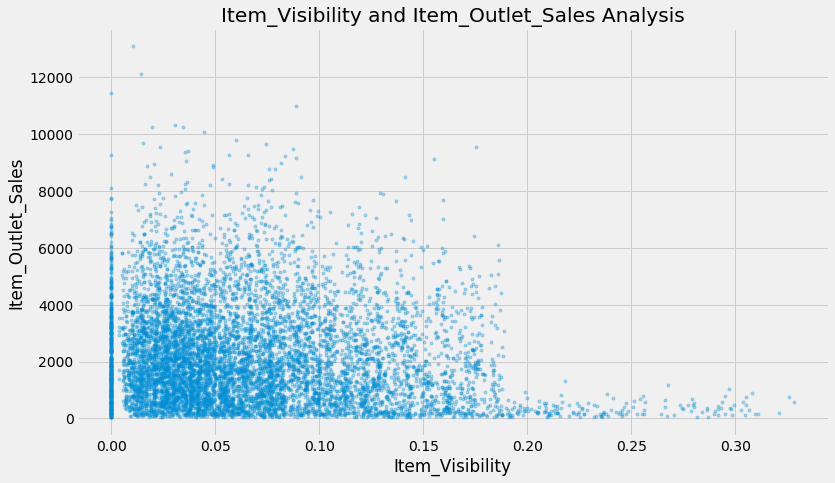

In [47]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(data.Item_Visibility, data.Item_Outlet_Sales,'.', alpha = 0.3)

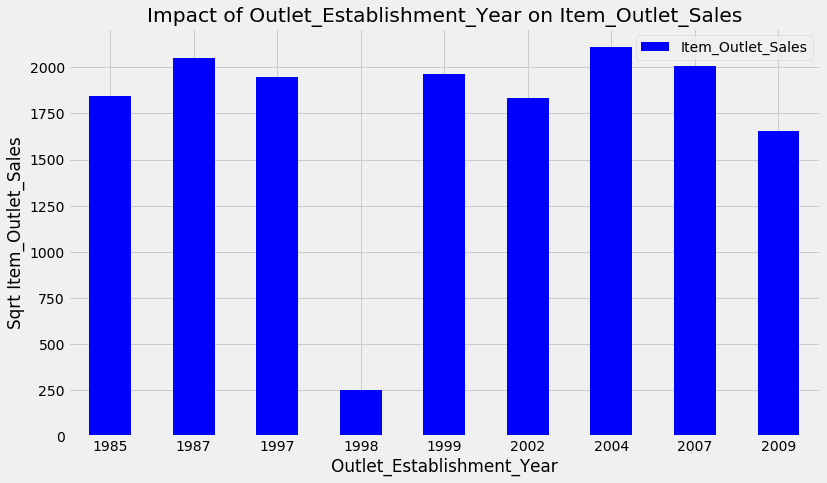

In [48]:
Outlet_Establishment_Year_pivot = \
data.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

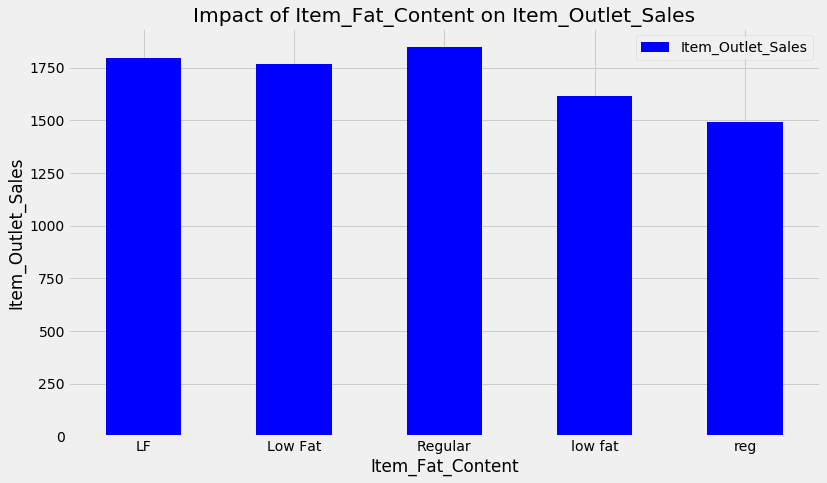

In [50]:
#Categorical Variables
#Impact of Item_Fat_Content on Item_Outlet_Sales

Item_Fat_Content_pivot = \
data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

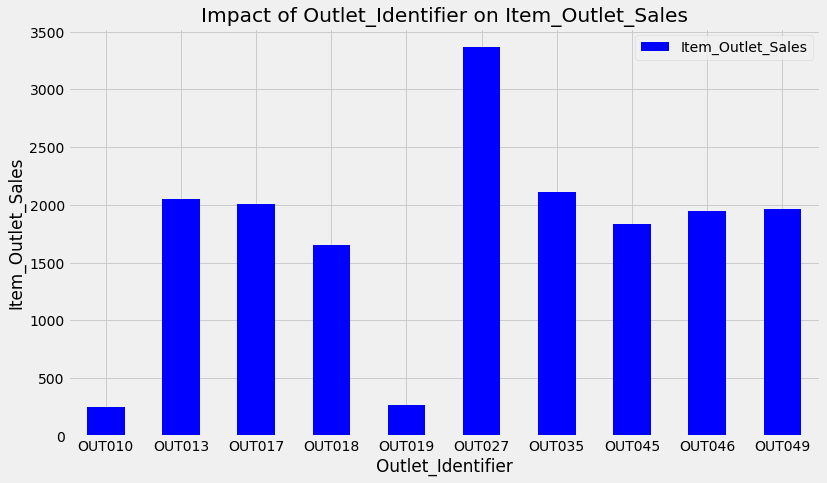

In [51]:
#Impact of Outlet_Identifier on Item_Outlet_Sales

Outlet_Identifier_pivot = \
data.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [52]:
data.pivot_table(values='Outlet_Type', columns='Outlet_Identifier', aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [54]:
data.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


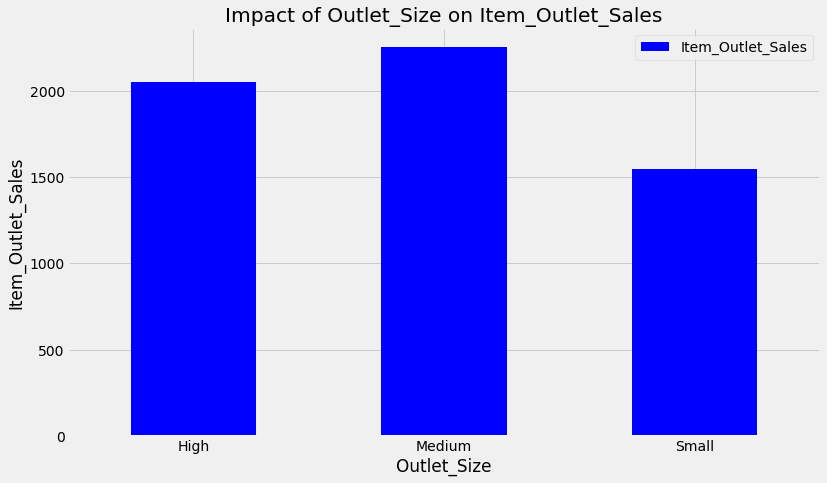

In [55]:
Outlet_Size_pivot = \
data.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Size on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

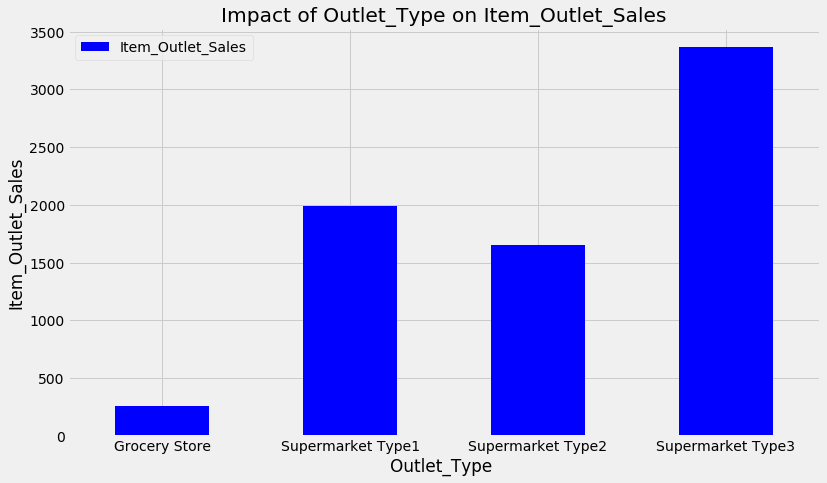

In [56]:
Outlet_Type_pivot = \
data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [70]:
data.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type', aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


In [59]:
#Data Preprocessing
#Check the percentage of null values per variable
data.isnull().sum()/data.shape[0]*100 #show values in percentage

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [60]:
#Imputing the mean for Item_Weight missing values
#aggfunc is mean by default! Ignores NaN by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
...                      ...
NCX05                 15.200
NCX06         

In [61]:
data[:][data['Item_Identifier'] == 'DRI11']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
1366,DRI11,NaN,Low Fat,0.060237,Hard Drinks,115.9834,OUT019,1985,Small,Tier 1,Grocery Store,345.5502
3127,DRI11,8.26,Low Fat,0.034458,Hard Drinks,113.3834,OUT049,1999,Medium,Tier 1,Supermarket Type1,2073.3012
5310,DRI11,8.26,Low Fat,0.057586,Hard Drinks,113.7834,OUT010,1998,NaN,Tier 3,Grocery Store,115.1834
7022,DRI11,8.26,Low Fat,0.034398,Hard Drinks,115.7834,OUT035,2004,Small,Tier 2,Supermarket Type1,2073.3012
7192,DRI11,8.26,Low Fat,0.034544,Hard Drinks,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1267.0174
8483,DRI11,8.26,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676


In [69]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 1463
Final #missing: 0


In [63]:
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [64]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 2410
Final #missing: 0


In [74]:
visibility_item_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
print(visibility_item_avg)

                 Item_Visibility
Item_Identifier                 
DRA12                   0.031956
DRA24                   0.048062
DRA59                   0.134718
DRB01                   0.082126
DRB13                   0.008002
DRB24                   0.020624
DRB25                   0.077305
DRB48                   0.023700
DRC01                   0.019219
DRC12                   0.037893
DRC13                   0.024409
DRC24                   0.024942
DRC25                   0.048159
DRC27                   0.064754
DRC36                   0.035994
DRC49                   0.065327
DRD01                   0.061336
DRD12                   0.066284
DRD13                   0.049132
DRD15                   0.068376
DRD24                   0.033784
DRD25                   0.083190
DRD27                   0.022682
DRD37                   0.015199
DRD49                   0.168146
DRD60                   0.041920
DRE01                   0.223469
DRE03                   0.026604
DRE12     

In [75]:
#Imputing Item_Visibility where its value is 0
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility
print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Original #zeros: 526
Final #zeros: 0


In [76]:
# Create a broad category of Item_Type
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [77]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())
print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',                                                      'reg':'Regular',
'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [78]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [79]:
#Categorical Variables — One Hot Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [80]:
#Dummy Variables:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
data.dtypes

Item_Identifier               object
Item_Weight                   object
Item_Visibility               object
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
O